import packages

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

Load data and data exploration

In [19]:
dataframe = pd.read_csv("conversion_data.csv")
dataframe.head(10)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
5,US,31,0,Seo,1,0
6,China,27,1,Seo,4,0
7,US,23,0,Ads,4,0
8,UK,29,0,Direct,4,0
9,US,25,0,Ads,2,0


inspect data (describe by default will show numerical columns)

In [7]:
dataframe.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


select categorical columns to show

In [21]:
dataframe[['country', 'source']].describe()

,country,source
count,316200,316200
unique,4,3
top,US,Seo
freq,178092,155040


Inspect Country's distribution

In [13]:
country_dist = dataframe.country.value_counts()
country_dist

US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64

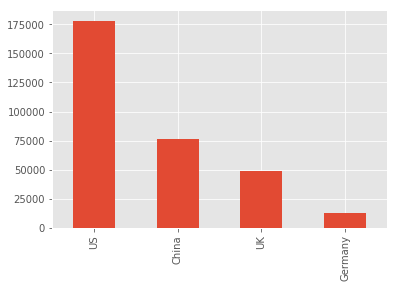

In [14]:
country_dist.plot(kind="bar")

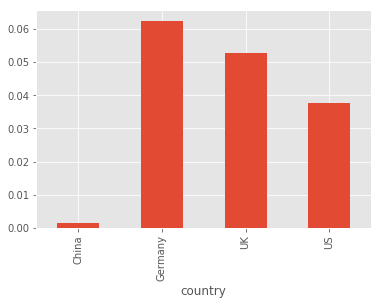

In [16]:
convert_by_country_dist = dataframe.groupby("country")["converted"].mean()
convert_by_country_dist.plot(kind="bar")

Inspect source's distribution

In [23]:
source_dist = dataframe.source.value_counts()
source_dist

Seo       155040
Ads        88740
Direct     72420
Name: source, dtype: int64

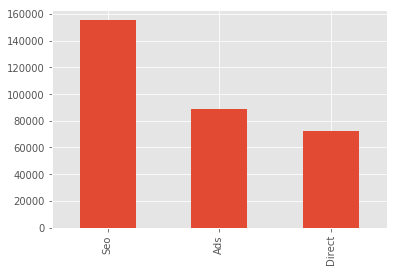

In [24]:
source_dist.plot(kind="bar")

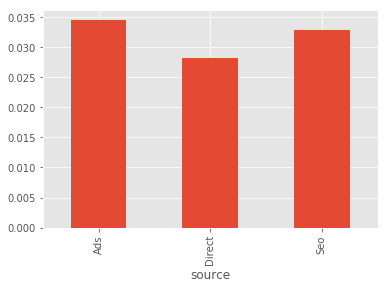

In [25]:
convert_by_source_dist = dataframe.groupby("source")["converted"].mean()
convert_by_source_dist.plot(kind="bar")

Inspect Age's distribution

Text(0.5,0,'age')

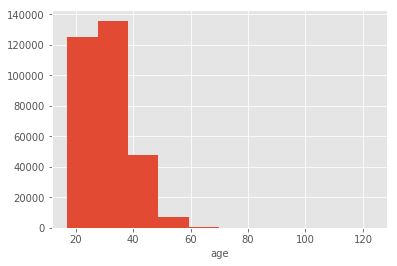

In [29]:
# plt.figure(figsize = (10, 5))
plt.hist(dataframe.age, bins = 10)
plt.xlabel('age', fontsize = 10)

locate outliers

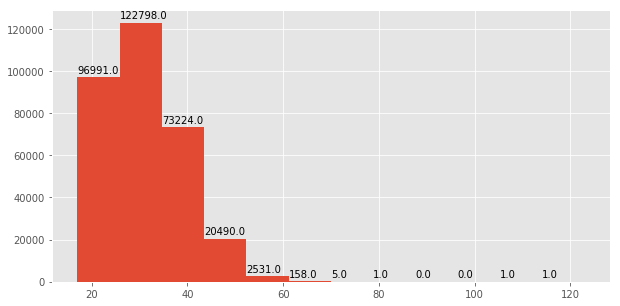

In [41]:
your_bins = 12
data = []
plt.figure(figsize = (10, 5))
arr = plt.hist(dataframe.age,bins=your_bins)
for i in range(your_bins):
    plt.text(arr[1][i],arr[0][i]+2000,str(arr[0][i]))

In [42]:
dataframe.query('age < 100')

(array([  9.69910000e+04,   1.22798000e+05,   7.32240000e+04,
          2.04900000e+04,   2.53100000e+03,   1.58000000e+02,
          5.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   1.00000000e+00]),
 array([  17.        ,   25.83333333,   34.66666667,   43.5       ,
          52.33333333,   61.16666667,   70.        ,   78.83333333,
          87.66666667,   96.5       ,  105.33333333,  114.16666667,  123.        ]),
 <a list of 12 Patch objects>)